# Series.corr(Series)/pd.corr()

# 範例1

In [31]:
#某財務軟體公司在全國有許多代理商，為研究它的財務軟體產品的廣告投入與銷售額的關係，
#統計人員隨機選擇10家代理商進行觀察，搜集到年廣告投入費和月平均銷售額的數據，
import numpy as np
import pandas as pd

data = {'年廣告費投入':[12.5, 15.3, 23.2, 26.4, 33.5, 34.4, 39.4, 45.2, 55.4, 60.9],
        '月均銷售額':[21.2, 23.9, 32.9, 34.1, 42.5, 43.2, 49.0, 52.8, 59.4, 63.5]}
dataFrame = pd.DataFrame(data, index=[2011,2012,2013,2014,2015,2016,2017,2018,2019,2020])
dataFrame

,年廣告費投入,月均銷售額
2011,12.5,21.2
2012,15.3,23.9
2013,23.2,32.9
2014,26.4,34.1
2015,33.5,42.5
2016,34.4,43.2
2017,39.4,49.0
2018,45.2,52.8
2019,55.4,59.4
2020,60.9,63.5


In [32]:
dataFrame['年廣告費投入'].corr(dataFrame['月均銷售額'])

0.9941983762371884

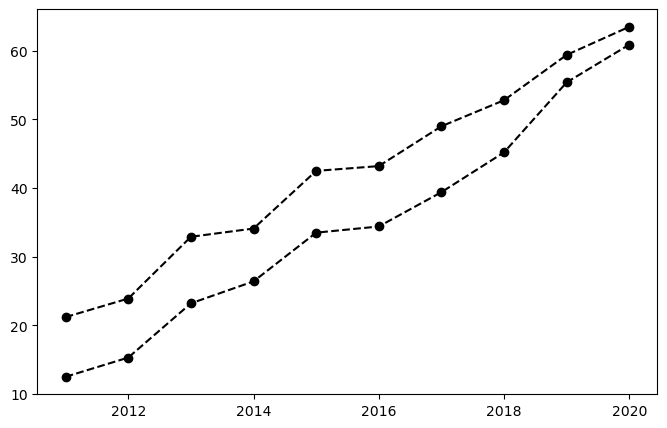

In [33]:
import matplotlib.pyplot as plt

figure = plt.figure(figsize=(8, 5))
axes = figure.add_subplot(1,1,1)
axes.plot(dataFrame.index,dataFrame.values,'ko--')
plt.show()

# 範例2

In [34]:
#從yahoo抓股票資訊(pip install pandas-datareader)(pip install yfinance)
#利用comprehension建資料
#利用Df.shift(1)算價差
#Df.loc['日期區間']
#Df.corr()找出4檔股票間的關係

In [35]:
#pip install pandas-datareader
#pip install yfinance
import yfinance as yf

from pandas_datareader import data as pdr
import yfinance as yf
yf.pdr_override()

dataFrame = pdr.get_data_yahoo('AAPL')
dataFrame

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1980-12-12,0.128348,0.128906,0.128348,0.128348,0.099450,469033600
1980-12-15,0.122210,0.122210,0.121652,0.121652,0.094261,175884800
1980-12-16,0.113281,0.113281,0.112723,0.112723,0.087343,105728000
1980-12-17,0.115513,0.116071,0.115513,0.115513,0.089504,86441600
1980-12-18,0.118862,0.119420,0.118862,0.118862,0.092099,73449600
...,...,...,...,...,...,...
2023-09-11,180.070007,180.300003,177.339996,179.360001,179.360001,58953100
2023-09-12,179.490005,180.130005,174.820007,176.300003,176.300003,90370200
2023-09-13,176.509995,177.300003,173.979996,174.210007,174.210007,84267900


In [36]:
#台積電(2330.TW),聯電(2303.TW),聯發科(2454.TW),鴻海(2317.TW)

pdr.get_data_yahoo('2330.TW')

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2000-01-04,69.649033,69.649033,68.475182,69.649033,34.844662,200662336736
2000-01-05,69.649033,71.214043,68.866341,71.214043,35.627617,402466805912
2000-01-06,70.822884,71.214043,69.649033,69.649033,34.844662,197545715802
2000-01-07,67.301331,68.475182,66.518639,67.692490,33.865829,235270344752
2000-01-10,69.649033,70.431351,68.475182,70.040192,35.040356,276171685539
...,...,...,...,...,...,...
2023-09-11,539.000000,540.000000,536.000000,536.000000,533.027771,14631968
2023-09-12,536.000000,545.000000,536.000000,544.000000,540.983398,16028336
2023-09-13,545.000000,548.000000,541.000000,541.000000,538.000000,16191392


In [37]:
#台積電(2330.TW),聯電(2303.TW),聯發科(2454.TW),鴻海(2317.TW)
all_data = {ticker:pdr.get_data_yahoo(ticker) for ticker in ['2330.TW', '2303.TW', '2454.TW', '2317.TW']}

all_data

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


{'2330.TW':                   Open        High         Low       Close   Adj Close  \
 Date                                                                     
 2000-01-04   69.649033   69.649033   68.475182   69.649033   34.844650   
 2000-01-05   69.649033   71.214043   68.866341   71.214043   35.627617   
 2000-01-06   70.822884   71.214043   69.649033   69.649033   34.844650   
 2000-01-07   67.301331   68.475182   66.518639   67.692490   33.865814   
 2000-01-10   69.649033   70.431351   68.475182   70.040192   35.040356   
 ...                ...         ...         ...         ...         ...   
 2023-09-11  539.000000  540.000000  536.000000  536.000000  533.027771   
 2023-09-12  536.000000  545.000000  536.000000  544.000000  540.983398   
 2023-09-13  545.000000  548.000000  541.000000  541.000000  538.000000   
 2023-09-14  544.000000  550.000000  543.000000  550.000000  550.000000   
 2023-09-15  549.000000  558.000000  547.000000  558.000000  558.000000   
 
            

In [38]:
import pandas as pd
import numpy as np

price = pd.DataFrame({ticker:data['Adj Close'] for ticker,data in all_data.items()})
price.columns = ['台積電','聯電','聯發科','鴻海']
price

,台積電,聯電,聯發科,鴻海
Date,,,,
1993-01-05,NaN,NaN,NaN,0.409765
1993-01-06,NaN,NaN,NaN,0.402878
1993-01-07,NaN,NaN,NaN,0.401157
1993-01-08,NaN,NaN,NaN,0.389105
1993-01-11,NaN,NaN,NaN,0.391687
...,...,...,...,...
2023-09-11,533.027771,46.049999,714.0,105.000000
2023-09-12,540.983398,46.799999,728.0,107.500000
2023-09-13,538.000000,47.099998,732.0,106.000000


In [39]:
import pandas as pd
import numpy as np

price = pd.DataFrame({ticker:data['Adj Close'] for ticker, data in all_data.items()})
price.columns = ['台積電','聯電','聯發科','鴻海']
price_2023 = price.loc['2023-01-01':]
price_2023

,台積電,聯電,聯發科,鴻海
Date,,,,
2023-01-03,445.975525,38.603394,581.645569,94.532784
2023-01-04,442.529785,38.277035,574.420105,93.578865
2023-01-05,451.390259,38.463524,569.904236,93.483475
2023-01-06,451.390259,39.535843,596.096375,93.865044
2023-01-09,473.541321,41.493984,609.643982,94.532784
...,...,...,...,...
2023-09-11,533.027771,46.049999,714.000000,105.000000
2023-09-12,540.983398,46.799999,728.000000,107.500000
2023-09-13,538.000000,47.099998,732.000000,106.000000


# pd.corr()

In [40]:
#4個股票的線關係
price_2023.corr()

,台積電,聯電,聯發科,鴻海
台積電,1.000000,0.529752,0.668237,0.799375
聯電,0.529752,1.000000,0.530781,0.235107
聯發科,0.668237,0.530781,1.000000,0.517655
鴻海,0.799375,0.235107,0.517655,1.000000


In [41]:
price_2023

,台積電,聯電,聯發科,鴻海
Date,,,,
2023-01-03,445.975525,38.603394,581.645569,94.532784
2023-01-04,442.529785,38.277035,574.420105,93.578865
2023-01-05,451.390259,38.463524,569.904236,93.483475
2023-01-06,451.390259,39.535843,596.096375,93.865044
2023-01-09,473.541321,41.493984,609.643982,94.532784
...,...,...,...,...
2023-09-11,533.027771,46.049999,714.000000,105.000000
2023-09-12,540.983398,46.799999,728.000000,107.500000
2023-09-13,538.000000,47.099998,732.000000,106.000000


In [42]:
#算價差
price_2023 - price_2023.shift(1)

,台積電,聯電,聯發科,鴻海
Date,,,,
2023-01-03,NaN,NaN,NaN,NaN
2023-01-04,-3.445740,-0.326359,-7.225464,-0.953918
2023-01-05,8.860474,0.186489,-4.515869,-0.095390
2023-01-06,0.000000,1.072319,26.192139,0.381569
2023-01-09,22.151062,1.958141,13.547607,0.667740
...,...,...,...,...
2023-09-11,-2.983337,0.349998,5.000000,-1.000000
2023-09-12,7.955627,0.750000,14.000000,2.500000
2023-09-13,-2.983398,0.299999,4.000000,-1.500000
